# Collatz 
- Code By Michael Sherif Naguib
- license: MIT open source
- Date: 12/20/18
- @University of Tulsa
- Description: Looking at some old code to see how to improve it

In [2]:
%matplotlib inline
#imports
import matplotlib.pyplot as plt
import numpy as np
import random
import math
import sys

In [3]:
# Progress Bar: DIRECTLY from stack overflow ALL credit for this function to the author at https://stackoverflow.com/questions/3160699/python-progress-bar
def update_progress(progress):

    barLength = 10 # Modify this to change the length of the progress bar
    status = ""
    if isinstance(progress, int):
        progress = float(progress)
    if not isinstance(progress, float):
        progress = 0
        status = "error: progress var must be float\r\n"
    if progress < 0:
        progress = 0
        status = "Halt...\r\n"
    if progress >= 1:
        progress = 1
        status = "Done...\r\n"
    block = int(round(barLength*progress))
    text = "\rPercent: [{0}] {1}% {2}".format( "#"*block + "-"*(barLength-block), progress*100, status)
    sys.stdout.write(text)
    sys.stdout.flush()

In [4]:
#Collatz function:
def collatz(n):
    r=n/2# more efficient than % edge case 0
    if r==n//2:
        return r
    else:
        return 3*n + 1

In [5]:
#Defines a collatz sequence that starts at a number and stops once 1 is reached: returns sequence as list
def collatz_sequence(start_num):
    num = collatz(start_num)
    all_nums = [num]   
    while(num != 1):
        num = collatz(num)
        all_nums.append(num)
    return all_nums

In [8]:
#GENERATION SETTINGS:
NUM_OF_POINTS=int(math.pow(10,6))
#generate a sequence of points 
x=[]
y=[]
for i in range(1,NUM_OF_POINTS):
    x.append(i)
    y.append(len(collatz_sequence(i)))
    if i/1000 == i//1000:
        update_progress(round((i / (NUM_OF_POINTS)) * 100) / 100)
x=np.array(x)
y=np.array(y)

Percent: [##########] 100% Done...99999%  
Percent: [##########] 100% Done...
Percent: [##########] 100% Done...
Percent: [##########] 100% Done...
Percent: [##########] 100% Done...


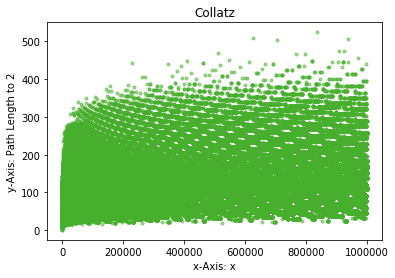

In [9]:
#setup the plot of the numbers
plt.title('Collatz')
plt.xlabel('x-Axis: x')
plt.ylabel('y-Axis: Path length')
plt.scatter(x, y, c=(random.random(),random.random(),random.random()), s=np.pi * 3, alpha=0.5)
plt.show()